In [15]:
import tensorflow as tf
import numpy as np

# Tnensorflow 5 例子

In [13]:
# creat data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1 + 0.3

In [18]:
### creat tensorflow structure start ###
Weights = tf.Variable( tf.random_uniform([1],-1.0,1.0) )
biases = tf.Variable( tf.zeros([1]) )

y = Weights*x_data + biases

loss = tf.reduce_mean( tf.square(y-y_data) )
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
### creat tensorflow structure start ###

sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print( step, sess.run(Weights), sess.run(biases) )

0 [ 0.62215161] [ 0.0308352]
20 [ 0.23239382] [ 0.23099613]
40 [ 0.13364778] [ 0.28246272]
60 [ 0.10855156] [ 0.29554293]
80 [ 0.1021734] [ 0.29886723]
100 [ 0.10055237] [ 0.29971212]
120 [ 0.10014039] [ 0.29992685]
140 [ 0.10003569] [ 0.29998142]
160 [ 0.10000908] [ 0.29999527]
180 [ 0.10000231] [ 0.29999882]
200 [ 0.1000006] [ 0.29999971]


# Tensorflow 6 Session

In [20]:
import tensorflow as tf

In [24]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])

product = tf.matmul(matrix1, matrix2)    # matrix multiply np.dot(m1,m2)

# method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

# method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]
[[12]]


# Tensorflow 7 Variable

In [2]:
import tensorflow as tf

In [2]:
state = tf.Variable(0, name='counter')
print(state.name)
one = tf.constant(1)

new_value = tf.add(state , one)
update = tf.assign(state , new_value)

init = tf.global_variables_initializer()  # must have if define variable

with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

counter:0
1
2
3


# Tensorflow 8 Placeholder

In [8]:
import tensorflow as tf
import numpy as np

In [26]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32, shape = (1,3))

output = tf.multiply(input1 , input2)


with tf.Session() as sess:
    print(sess.run(output, feed_dict = {input1:[2.],input2:[[7.,4.,2.]]}))

[[ 14.   8.   4.]]


# Tensorflow 10 def add_layer

In [1]:
import tensorflow as tf

In [3]:
 def add_layer(inputs, in_size, out_size, activation_funtion=None):
        Weights = tf.Variable( tf.random_normal( [in_size,out_size] ) )
        biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1 )
        Wx_plus_b = tf.matmul( inputs,Weights ) + biases
        if activation_funtion is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_funtion( Wx_plus_b )
        return outputs

# Tensorflow 11 build a neural network

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
 def add_layer(inputs, in_size, out_size, activation_funtion=None):
        Weights = tf.Variable( tf.random_normal( [in_size,out_size] ) )
        biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1 )
        Wx_plus_b = tf.matmul( inputs,Weights ) + biases
        if activation_funtion is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_funtion( Wx_plus_b )
        return outputs

In [14]:
x_data = np.linspace( -1,1,300 )[:,np.newaxis]
noise = np.random.normal( 0,0.05,x_data.shape )
y_data = np.square( x_data ) - 0.5 + noise

In [15]:
xs = tf.placeholder( tf.float32,[None,1] )
ys = tf.placeholder( tf.float32,[None,1] )

l1 = add_layer( xs,1,10,activation_funtion=tf.nn.relu )
prediction = add_layer( l1,10,1 )

loss = tf.reduce_mean( tf.reduce_sum( tf.square( ys - prediction ),reduction_indices=[1] ) )
train_step = tf.train.GradientDescentOptimizer( 0.1 ).minimize( loss )

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run( init )

for i in range(1000):
    sess.run( train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        print(sess.run( loss,feed_dict={xs:x_data,ys:y_data}))

0.461601
0.0120344
0.00790422
0.00604386
0.0050218
0.00450687
0.00421083
0.00398839
0.00381866
0.00365744
0.00352286
0.00343137
0.00335766
0.00329151
0.00323591
0.00319109
0.00315392
0.00312234
0.00309026
0.00305456


# Tensorflow 12 plot result

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [17]:
def add_layer(inputs, in_size, out_size, activation_funtion=None):
        Weights = tf.Variable( tf.random_normal( [in_size,out_size] ) )
        biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1 )
        Wx_plus_b = tf.matmul( inputs,Weights ) + biases
        if activation_funtion is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_funtion( Wx_plus_b )
        return outputs

In [18]:
x_data = np.linspace( -1,1,300 )[:,np.newaxis]
noise = np.random.normal( 0,0.05,x_data.shape )
y_data = np.square( x_data ) - 0.5 + noise

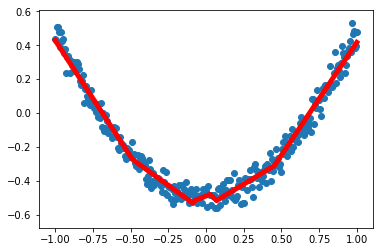

In [20]:
xs = tf.placeholder( tf.float32,[None,1] )
ys = tf.placeholder( tf.float32,[None,1] )

l1 = add_layer( xs,1,10,activation_funtion=tf.nn.relu )
prediction = add_layer( l1,10,1 )

loss = tf.reduce_mean( tf.reduce_sum( tf.square( ys - prediction ),reduction_indices=[1] ) )
train_step = tf.train.GradientDescentOptimizer( 0.1 ).minimize( loss )

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run( init )

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter( x_data,y_data )
#plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)

# Tensorflow 13 optimizer

In [31]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.train.GradientDescentOptimizer()
tf.train.MomentumOptimizer()
tf.train.AdamOptimizer

# Tensorflow 14 Tensorboard

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
def add_layer(inputs, in_size, out_size, n_layer, activation_funtion=None):
    # add one more layer and return the output of this layer
    layer_name = 'layer%s' % n_layer
    with tf.name_scope(layer_name):
        with tf.name_scope('weights'):
            Weights = tf.Variable( tf.random_normal( [in_size,out_size] ),name='W' )
            tf.summary.histogram(layer_name+'/weight',Weights)
        with tf.name_scope('biases'):
            biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1,name='b' )
            tf.summary.histogram(layer_name+'/biases',biases)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul( inputs,Weights ) + biases
        if activation_funtion is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_funtion( Wx_plus_b )
        tf.summary.histogram(layer_name+'/outputs',outputs )
        return outputs

In [3]:
x_data = np.linspace( -1,1,300 )[:,np.newaxis]
noise = np.random.normal( 0,0.05,x_data.shape )
y_data = np.square( x_data ) - 0.5 + noise

In [4]:
# define placeholder for inputs to network
with tf.name_scope('inputs'):
    xs = tf.placeholder( tf.float32,[None,1],name='x_input' )
    ys = tf.placeholder( tf.float32,[None,1],name='y_input' )

# add hidden layer

l1 = add_layer( xs,1,10,n_layer=1,activation_funtion=tf.nn.relu )
# add output layer
prediction = add_layer( l1,10,1,n_layer=2 )

# the error between prediction and real data
with tf.name_scope( 'loss' ):
    loss = tf.reduce_mean( tf.reduce_sum( tf.square( ys - prediction ),reduction_indices=[1] ) )
    tf.summary.scalar( 'loss',loss )
with tf.name_scope( 'train' ):
    train_step = tf.train.GradientDescentOptimizer( 0.1 ).minimize( loss )

sess = tf.Session()
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter( "logs/",sess.graph )
# important step
sess.run( tf.global_variables_initializer() )

for i in range(1000):
    sess.run( train_step,feed_dict={xs:x_data,ys:y_data} )
    if i % 50 == 0:
        result = sess.run( merged,feed_dict={xs:x_data,ys:y_data} )
        writer.add_summary( result,i )
# Finally, using the tensorboard to draw the figure of the network
# example: 'tensorboard --logdir='logs/'

# Tensorflow 16 Classification

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [2]:
def add_layer(inputs, in_size, out_size, activation_funtion=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable( tf.random_normal( [in_size,out_size] ),name='W' )
    biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1,name='b' )
    Wx_plus_b = tf.matmul( inputs,Weights ) + biases
    if activation_funtion is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_funtion( Wx_plus_b )
    return outputs

In [7]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction,feed_dict={xs:v_xs})
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={xs:v_xs , ys:v_ys})
    return result

In [4]:
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [8]:
xs = tf.placeholder( tf.float32,[None,784] )
ys = tf.placeholder( tf.float32,[None,10] )

prediction = add_layer( xs,784,10,activation_funtion=tf.nn.softmax )

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction)
                                              ,reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    sess.run( train_step,feed_dict={xs:batch_xs , ys:batch_ys})
    if i % 50 == 0:
        print(compute_accuracy(mnist.test.images,mnist.test.labels))

0.138
0.6479
0.7471
0.7894
0.8068
0.821
0.8303
0.8415
0.846
0.8495
0.855
0.8585
0.8565
0.8653
0.8628
0.8669
0.8689
0.8744
0.8754
0.8744


# Tensorflow 17 dropout

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def add_layer(inputs, in_size, out_size, layer_name, keep_prod, activation_funtion=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable( tf.random_normal( [in_size,out_size] ),name='W' )
    biases = tf.Variable( tf.zeros( [1,out_size] ) + 0.1,name='b ' )
    Wx_plus_b = tf.matmul( inputs,Weights ) + biases
    Wx_plus_b = tf.nn.dropout(Wx_plus_b,keep_prod)
    if activation_funtion is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_funtion( Wx_plus_b )
    tf.summary.histogram(layer_name+'/outputs',outputs )
    return outputs

In [3]:
digits = load_digits()
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3)

In [4]:
keep_prod = tf.placeholder( tf.float32 )
xs = tf.placeholder( tf.float32,[None,64] )
ys = tf.placeholder( tf.float32,[None,10] )

l1 = add_layer( xs,64,50,'l1',keep_prod,activation_funtion=tf.nn.tanh)
prediction = add_layer( l1,50,10,'l2',keep_prod,activation_funtion=tf.nn.softmax )

cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction)
                                              ,reduction_indices=[1]))
tf.summary.scalar('loss',cross_entropy)
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

sess = tf.Session()
merged = tf.summary.merge_all()

train_writer = tf.summary.FileWriter( "logs/train",sess.graph )
test_writer = tf.summary.FileWriter( "logs/test",sess.graph )

sess.run(tf.global_variables_initializer())

for i in range(500):
    sess.run( train_step,feed_dict={xs:X_train , ys:y_train,keep_prod:0.5} )
    if i % 50 == 0:
        train_result = sess.run( merged,feed_dict={xs:X_train , ys:y_train , keep_prod:1} )
        test_result = sess.run( merged,feed_dict={xs:X_test , ys:y_test , keep_prod:1} )
        
        train_writer.add_summary( train_result,i )
        test_writer.add_summary( test_result,i )

# CNN

In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [13]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction,feed_dict={xs:v_xs,keep_prod:1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1),tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    result = sess.run(accuracy,feed_dict={xs:v_xs , ys:v_ys})
    return result

In [14]:
def weight_variable(shape):
    inital = tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(inital)

In [15]:
def bias_variable(shape):
    inital = tf.constant(0.1,shape=shape)
    return tf.Variable(inital)

In [16]:
def conv2d(x,W):
    # strides [1, x_movement, y_movement, 1]
    # Must have strides[0]=strides[4]=1
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME' ) 

In [17]:
def max_pool_2x2(x):
    # strides [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [18]:
mnist = input_data.read_data_sets( 'MNIST_data',one_hot=True )

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [20]:
xs = tf.placeholder( tf.float32,[None,784] )
ys = tf.placeholder( tf.float32,[None,10] )
keep_prod = tf.placeholder( tf.float32 )
x_image = tf.reshape( xs,[-1,28,28,1]) # [num,width,length,channel]
# print(x_image.shape) # [n_sameples,28,28,1]

# conv1 layer
W_conv1 = weight_variable( [5,5,1,4] )# patch 5x5, in size 1, out size 4
b_conv1 = bias_variable( [4] )
h_conv1 = tf.nn.relu( conv2d( x_image,W_conv1 ) + b_conv1 )# output size is 28x28x4
h_pool1 = max_pool_2x2( h_conv1 )                          # output size is 14x14x4

# conv2 layer
W_conv2 = weight_variable( [5,5,4,8] )# patch 5x5, in size 4, out size 8
b_conv2 = bias_variable( [8] )
h_conv2 = tf.nn.relu( conv2d( h_pool1,W_conv2 ) + b_conv2 )# output size is 14x14x8
h_pool2 = max_pool_2x2( h_conv2 )                          # output size is 7x7x8

# func1 layer
W_fcl = weight_variable( [7*7*8,1024] )
b_fc1 = bias_variable( [1024] )
h_pool2_flat = tf.reshape( h_pool2,[-1,7*7*8] )# [n_sample,7,7,64]->>[n_sample,7*7*64]
h_fc1 = tf.nn.relu( tf.matmul( h_pool2_flat,W_fcl ) + b_fc1 )
h_fc1_drop = tf.nn.dropout( h_fc1,keep_prod )

# func2 layer
W_fc2 = weight_variable( [1024,10] )
b_fc2 = bias_variable( [10] )
prediction = tf.nn.softmax( tf.matmul( h_fc1_drop,W_fc2 ) + b_fc2 )

cross_entroy = tf.reduce_mean( -tf.reduce_sum(ys * tf.log(prediction),reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entroy)

sess = tf.Session()
sess.run( tf.global_variables_initializer() )

for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    sess.run( train_step,feed_dict={xs:batch_xs , ys:batch_ys , keep_prod:0.5} )
    if i % 50 == 0:
        print(compute_accuracy( mnist.test.images , mnist.test.labels ))

0.1073
0.4297
0.6687
0.7587
0.8139
0.8429
0.8642
0.8804
0.89
0.8969
0.9063
0.9136
0.9142
0.9239
0.9223
0.9268
0.9304
0.9342
0.9357
0.9383


# Tensorflow 19 Saver

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Save to file
# remember to define the same dtype and shape when restore
W = tf.Variable( [[1,2,3],[3,4,5]],dtype=tf.float32,name='weights' )
b = tf.Variable( [[1,2,3]],dtype=tf.float32,name='biases' )

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    save_path = saver.save(sess,"my_net/save_net.ckpt")
    print("Save to paht: ",save_path)

Save to paht:  my_net/save_net.ckpt


In [2]:
# restore variables
# redefine the same shape and same dtype for your variable
W = tf.Variable( np.arange(6).reshape((2,3)),dtype=tf.float32,name="weights" )
b = tf.Variable( np.arange(3).reshape((1,3)),dtype=tf.float32,name="biases" )

# not need init step
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore( sess,"my_net/save_net.ckpt" )
    print( "weight: ",sess.run(W) )
    print( "biases: ",sess.run(b) )

INFO:tensorflow:Restoring parameters from my_net/save_net.ckpt
weight:  [[ 1.  2.  3.]
 [ 3.  4.  5.]]
biases:  [[ 1.  2.  3.]]


# Tensorflow 20 RNN

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as py

In [2]:
# set data
mnist = input_data.read_data_sets( 'MNIST_data',one_hot=True )

# hyperparameters
lr = 0.6
training_iters = 100000
batch_size = 100

n_inputs = 28
n_steps = 28
n_hidden_unis = 128
n_classes = 10


Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
# tf Graph input
x = tf.placeholder( tf.float32,[None,n_steps,n_inputs] )
y = tf.placeholder( tf.float32,[None,n_classes] )

# Define weights
weights = {'in':tf.Variable( tf.random_normal([n_inputs,n_hidden_unis]) ),
           'out':tf.Variable( tf.random_normal([n_hidden_unis,n_classes]) )}
biases = {'in':tf.Variable( tf.constant(0.1,shape=[n_hidden_unis,]) ),
          'out':tf.Variable( tf.constant(0.1,shape=[n_classes,]) )}

In [4]:
def RNN(X, weights, biases):
    # hidden layer for input to cell
    X = tf.reshape(X,[-1,n_inputs])
    X_in = tf.matmul(X,weights['in']) + biases['in']
    X_in = tf.reshape(X_in,[-1,n_steps,n_hidden_unis])
    
    # cell
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden_unis,forget_bias=1.0,state_is_tuple=True)
    # lstm cell is divided into two parts(c_state,m_state)
    _init_state = lstm_cell.zero_state(batch_size,dtype=tf.float32)
    
    # if time is the first dim of X_in, time_major=True
    outputs,states = tf.nn.dynamic_rnn(lstm_cell,X_in,initial_state=_init_state,time_major=False)
    
    # hidden layer for output as the final results
    #results = tf.matmul(states[1],weights['out']) + biases['out']
    # or
    outputs = tf.unstack(tf.transpose(outputs,[1,0,2]))
    results = tf.matmul(outputs[-1],weights['out']) + biases['out']
    
    return results

In [5]:
pred = RNN( x,weights,biases )
cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits( labels=y , logits=pred ) )
train_op = tf.train.GradientDescentOptimizer(lr).minimize(cost)

correct_pred = tf.equal( tf.argmax(pred,1),tf.argmax(y,1) )
accuracy = tf.reduce_mean( tf.cast(correct_pred,tf.float32) )

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:
        batch_xs,batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape([batch_size,n_steps,n_inputs])
        sess.run(train_op,feed_dict={x:batch_xs , y:batch_ys})
        if step % 20 == 0:
            acc = 0
            for _ in range(int(10000/batch_size)):
                test_xs,test_ys = mnist.test.next_batch(batch_size)
                test_xs = test_xs.reshape([batch_size,n_steps,n_inputs])
                acc = acc + sess.run(accuracy,feed_dict={x:test_xs , y:test_ys })*batch_size
            print(acc/10000)
            #print(sess.run(accuracy,feed_dict={x:batch_xs , y:batch_ys }))
        step += 1

0.106399999484
0.468199997544
0.568599997759
0.669500001669
0.719299999475
0.775399998426
0.767799999714
0.725400001407
0.818799999952
0.794799997807
0.840699997544
0.831599997282
0.83539999783
0.828099996448
0.84720000267
0.862300000787
0.734700000286
0.86279999733
0.869900000095
0.877300004363
0.881899998784
0.862299997211
0.882199998498
0.883200002909
0.896800000072
0.881100000143
0.896600000858
0.884499998093
0.888700000644
0.883700000048
0.900800001621
0.902899997234
0.900700000525
0.905800001621
0.913000004888
0.902200003266
0.896099999547
0.908300004005
0.900200001597
0.908200001121
0.917000003457
0.910100002289
0.89469999969
0.91210000217
0.922099999785
0.915600003004
0.928000003099
0.919800000191
0.929700002074
0.924799999595


# Tensorflow 20 RNN lstm regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

BATCH_START = 0     # 建立 batch data 时候的 index
TIME_STEPS = 20     # backpropagation through time 的 time_steps
BATCH_SIZE = 50     
INPUT_SIZE = 1      # sin 数据输入 size
OUTPUT_SIZE = 1     # cos 数据输出 size
CELL_SIZE = 10      # RNN 的 hidden unit size 
LR = 0.006          # learning rate

In [2]:
def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    # returned seq, res and xs: shape (batch, step, input)
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

In [3]:
class LSTMRNN(object):
    def __init__(self, n_steps, input_size, output_size, cell_size, batch_size):
        self.n_steps = n_steps
        self.input_size = input_size
        self.output_size = output_size
        self.cell_size = cell_size
        self.batch_size = batch_size
        with tf.name_scope('inputs'):
            self.xs = tf.placeholder(tf.float32, [None, n_steps, input_size], name='xs')
            self.ys = tf.placeholder(tf.float32, [None, n_steps, output_size], name='ys')
        with tf.variable_scope('in_hidden'):
            self.add_input_layer()
        with tf.variable_scope('LSTM_cell'):
            self.add_cell()
        with tf.variable_scope('out_hidden'):
            self.add_output_layer()
        with tf.name_scope('cost'):
            self.compute_cost()
        with tf.name_scope('train'):
            self.train_op = tf.train.AdamOptimizer(LR).minimize(self.cost)
    
    def add_input_layer(self,):
        l_in_x = tf.reshape(self.xs, [-1, self.input_size], name='2_2D')  # (batch*n_step, in_size)
        # Ws (in_size, cell_size)
        Ws_in = self._weight_variable([self.input_size, self.cell_size])
        # bs (cell_size, )
        bs_in = self._bias_variable([self.cell_size,])
        # l_in_y = (batch * n_steps, cell_size)
        with tf.name_scope('Wx_plus_b'):
            l_in_y = tf.matmul(l_in_x, Ws_in) + bs_in
        # reshape l_in_y ==> (batch, n_steps, cell_size)
        self.l_in_y = tf.reshape(l_in_y, [-1, self.n_steps, self.cell_size], name='2_3D')
        
    def add_cell(self):
        lstm_cell = tf.contrib.rnn.BasicLSTMCell(self.cell_size, forget_bias=1.0, state_is_tuple=True)
        with tf.name_scope('initial_state'):
            self.cell_init_state = lstm_cell.zero_state(self.batch_size, dtype=tf.float32)
        self.cell_outputs, self.cell_final_state = tf.nn.dynamic_rnn(
            lstm_cell, self.l_in_y, initial_state=self.cell_init_state, time_major=False)
        
    def add_output_layer(self):
        # shape = (batch * steps, cell_size)
        l_out_x = tf.reshape(self.cell_outputs, [-1, self.cell_size], name='2_2D')
        Ws_out = self._weight_variable([self.cell_size, self.output_size])
        bs_out = self._bias_variable([self.output_size, ])
        # shape = (batch * steps, output_size)
        with tf.name_scope('Wx_plus_b'):
            self.pred = tf.matmul(l_out_x, Ws_out) + bs_out
    
    def compute_cost(self):
        losses = tf.contrib.legacy_seq2seq.sequence_loss_by_example(
            [tf.reshape(self.pred, [-1], name='reshape_pred')],
            [tf.reshape(self.ys, [-1], name='reshape_target')],
            [tf.ones([self.batch_size * self.n_steps], dtype=tf.float32)],
            average_across_timesteps=True,
            softmax_loss_function=self.ms_error,
            name='losses'
        )
        with tf.name_scope('average_cost'):
            self.cost = tf.div(
                tf.reduce_sum(losses, name='losses_sum'),
                self.batch_size,
                name='average_cost')
            tf.summary.scalar('cost', self.cost)

    def ms_error(self, labels, logits):
        return tf.square(labels-logits)

    def _weight_variable(self, shape, name='weights'):
        initializer = tf.random_normal_initializer(mean=0., stddev=1.,)
        return tf.get_variable(shape=shape, initializer=initializer, name=name)

    def _bias_variable(self, shape, name='biases'):
        initializer = tf.constant_initializer(0.1)
        return tf.get_variable(name=name, shape=shape, initializer=initializer)

In [4]:
if __name__ == '__main__':
    # 搭建 LSTMRNN 模型
    model = LSTMRNN(TIME_STEPS, INPUT_SIZE, OUTPUT_SIZE, CELL_SIZE, BATCH_SIZE)
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    
    # 训练 200 次
    for i in range(200):
        seq, res, xs = get_batch()  # 提取 batch data
        if i == 0:
        # 初始化 data
            feed_dict = {
                    model.xs: seq,
                    model.ys: res,
            }
        else:
            feed_dict = {
                model.xs: seq,
                model.ys: res,
                model.cell_init_state: state    # 保持 state 的连续性
            }
        
        # 训练
        _, cost, state, pred = sess.run(
            [model.train_op, model.cost, model.cell_final_state, model.pred],
            feed_dict=feed_dict)
        
        # 打印 cost 结果
        if i % 20 == 0:
            print('cost: ', round(cost, 4))

cost:  10.5351
cost:  7.348
cost:  2.6459
cost:  2.1704
cost:  0.6533
cost:  0.2235
cost:  0.3024
cost:  0.3607
cost:  0.045
cost:  0.0644


# Tensorflow 21 Autoencoder

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets( 'MNIST_data',one_hot=True )

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2
    
# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [4]:
# Parameter
learning_rate = 0.01
training_epochs = 20 # 五组训练
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_input = 784  # MNIST data input (img shape: 28*28)

X = tf.placeholder("float", [None, n_input])

# hidden layer settings
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
weights = {
    'encoder_h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2,n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    }
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
    }

In [5]:
# Construct model
encoder_op = encoder(X)             # 128 Features
decoder_op = decoder(encoder_op)    # 784 Features

# Prediction
y_pred = decoder_op	# After 
# Targets (Labels) are the input data.
y_true = X            # Before
# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Epoch: 0001 cost= 0.085699007
Epoch: 0002 cost= 0.071234301
Epoch: 0003 cost= 0.071546800
Epoch: 0004 cost= 0.066919550
Epoch: 0005 cost= 0.064331219
Epoch: 0006 cost= 0.061146416
Epoch: 0007 cost= 0.061886013
Epoch: 0008 cost= 0.059647769
Epoch: 0009 cost= 0.058098666
Epoch: 0010 cost= 0.059562646
Epoch: 0011 cost= 0.056229651
Epoch: 0012 cost= 0.055639364
Epoch: 0013 cost= 0.056844439
Epoch: 0014 cost= 0.058168046
Epoch: 0015 cost= 0.057445101
Epoch: 0016 cost= 0.053151667
Epoch: 0017 cost= 0.056329407
Epoch: 0018 cost= 0.055452805
Epoch: 0019 cost= 0.055545092
Epoch: 0020 cost= 0.054318339
Optimization Finished!


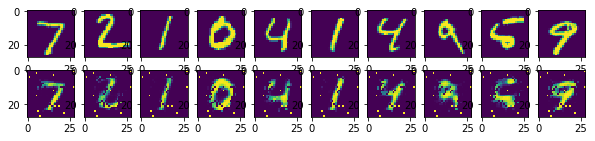

In [6]:
# Launch the graph
with tf.Session() as sess:
    # tf 马上就要废弃tf.initialize_all_variables()这种写法
    # 替换成下面:
    sess.run(tf.global_variables_initializer())
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)  # max(x) = 1, min(x) = 0
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()